In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Load the prepared dataset from the previous step
df = pd.read_csv('data/olist_prepared_dataset.csv')

# Ensure our main date column is in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


1. KPI ANALYSIS: Customer Churn

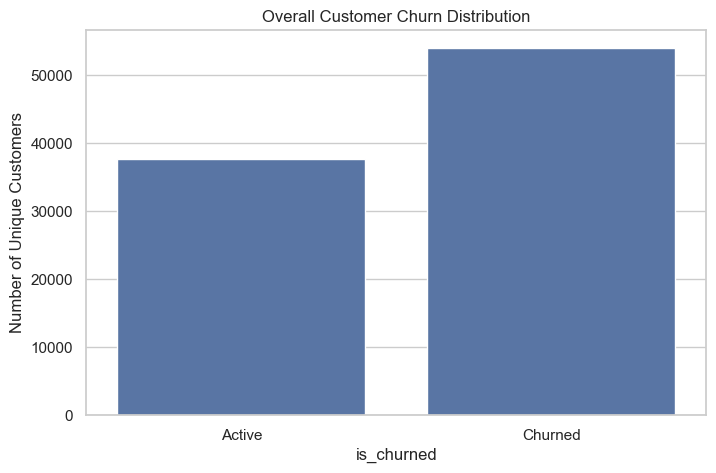

In [12]:
# Analyze the overall churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='is_churned', data=df.drop_duplicates(subset=['customer_unique_id']))
plt.title('Overall Customer Churn Distribution')
plt.xticks(ticks=[0, 1], labels=['Active', 'Churned'])
plt.ylabel('Number of Unique Customers')
plt.show()

Inference: This graph immediately highlights that customer retention is a major challenge. A large portion of the customer base does not return to make subsequent purchases. This validates the importance of this project and provides a baseline metric that retention strategies should aim to improve.

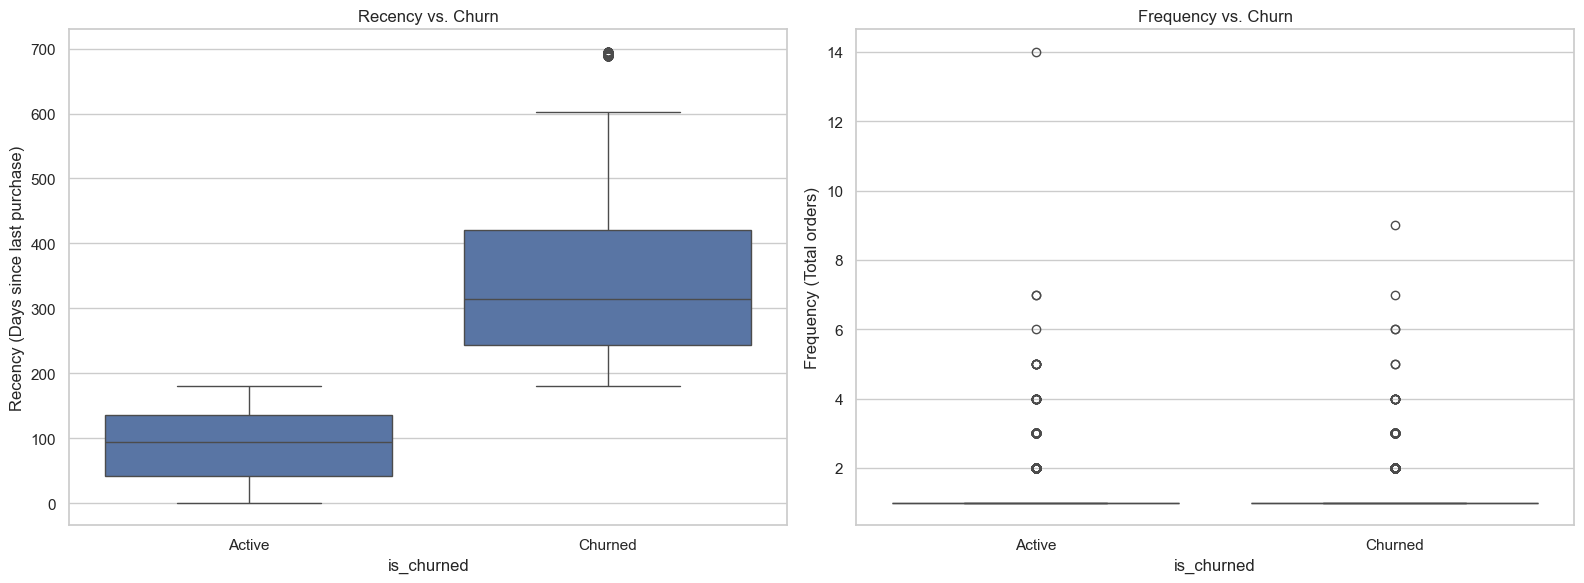

In [13]:
# Analyze churn by Recency and Frequency
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Recency vs. Churn
sns.boxplot(x='is_churned', y='recency', data=df.drop_duplicates(subset=['customer_unique_id']), ax=axes[0])
axes[0].set_title('Recency vs. Churn')
axes[0].set_xticks([0, 1]) 
axes[0].set_xticklabels(['Active', 'Churned'])
axes[0].set_ylabel('Recency (Days since last purchase)')


# Frequency vs. Churn
sns.boxplot(x='is_churned', y='frequency', data=df.drop_duplicates(subset=['customer_unique_id']), ax=axes[1])
axes[1].set_title('Frequency vs. Churn')
axes[1].set_xticks([0, 1]) 
axes[1].set_xticklabels(['Active', 'Churned'])
axes[1].set_ylabel('Frequency (Total orders)')


plt.tight_layout()
plt.show()

Inference: This provides two critical insights. First, it confirms that our 180-day churn definition is valid. Second, it proves that the biggest predictor of churn is a customer's failure to make a second purchase. The business must focus its efforts on encouraging that next transaction to build loyalty.



2. KPI ANALYSIS: Delivery Time & Review Score

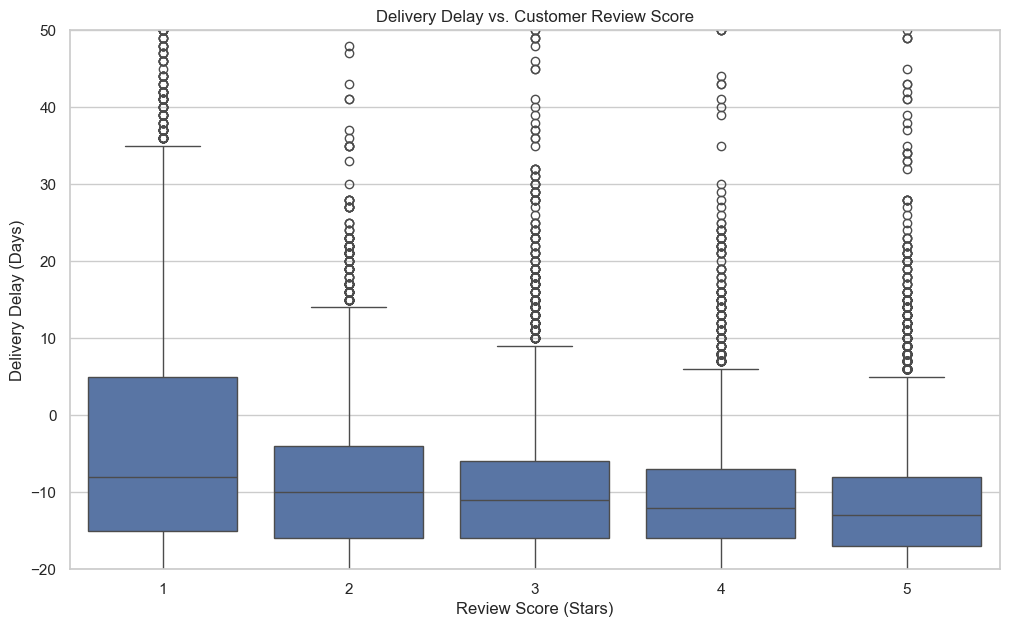

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='review_score', y='delivery_delay', data=df)
plt.title('Delivery Delay vs. Customer Review Score')
plt.xlabel('Review Score (Stars)')
plt.ylabel('Delivery Delay (Days)')
plt.ylim(-20, 50) # Zoom in to see the distribution more clearly
plt.show()

Inference: Customer satisfaction is not primarily about the product; it's about the delivery experience. The single most effective way to improve customer satisfaction and brand perception is to improve on-time delivery performance. This is a direct, actionable insight for the logistics and operations teams.

3. KPI ANALYSIS: Sales Volumes

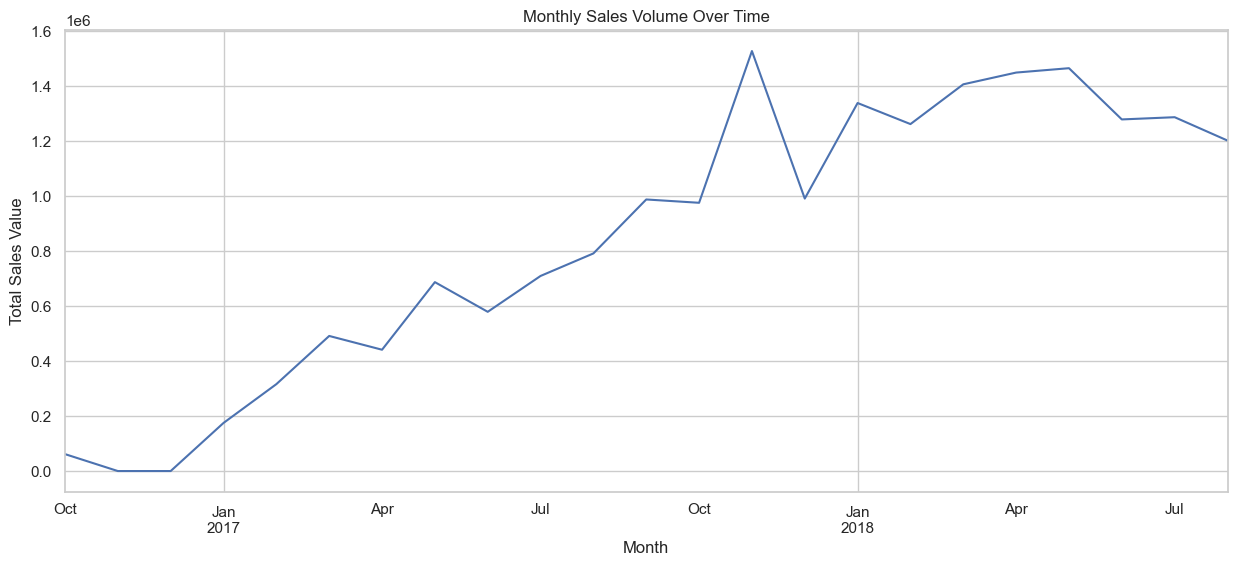

In [15]:
# Resample data to get monthly sales
monthly_sales = df.set_index('order_purchase_timestamp')['payment_value'].resample('ME').sum()

# Plot monthly sales trend
plt.figure(figsize=(15, 6))
monthly_sales.plot(title='Monthly Sales Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.show()

Inference: The business is highly seasonal, likely driven by major shopping events like Black Friday and the holiday season. This insight is crucial for inventory management (to prevent stockouts during the peak) and for strategic marketing (to maximize revenue during this critical period).



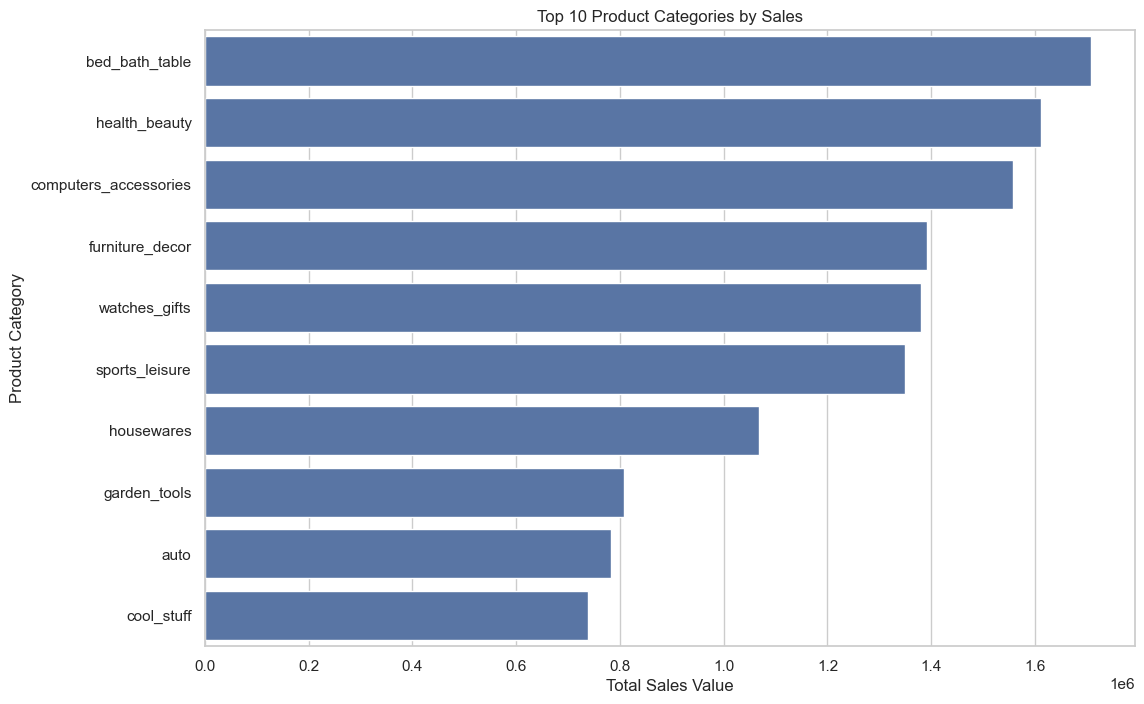

In [16]:
# Analyze top 10 product categories by sales
top_10_categories = df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_categories.index, x=top_10_categories.values, orient='h')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Category')
plt.show()

Inference: The business relies heavily on a few "hero" categories. While these are clearly areas of strength, this concentration also represents a risk. The business should not only ensure these popular categories are always well-stocked but also consider strategies to promote and grow other, less-popular categories to diversify its revenue streams.

4. Geographical Analysis: Sales and Customer Hotspots 

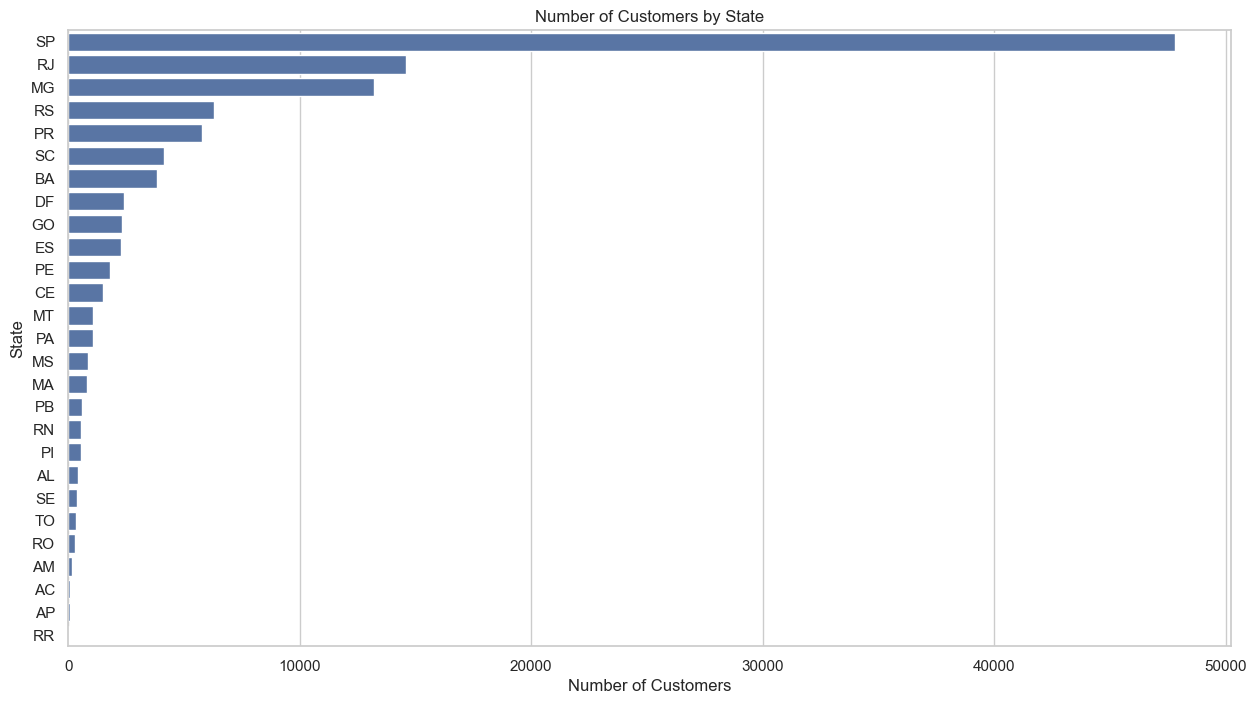

In [17]:
import plotly.express as px

geo_df = df.sample(n=10000, random_state=42)

fig = px.scatter_geo(
    geo_df,
    lat='geolocation_lat',
    lon='geolocation_lng',
    scope='south america',
    hover_name='customer_city',
    title='Geographical Distribution of Customers'
)

plt.figure(figsize=(15, 8))
sns.countplot(y='customer_state', data=df, order=df['customer_state'].value_counts().index)
plt.title('Number of Customers by State')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.show()

Inference: The bar chart will clearly show that the vast majority of customers are located in the state of São Paulo (SP), with other southeastern states like Rio de Janeiro (RJ) and Minas Gerais (MG) also being significant. This confirms that the business is heavily concentrated in Brazil's economic heartland.


4. Payment Method Analysis

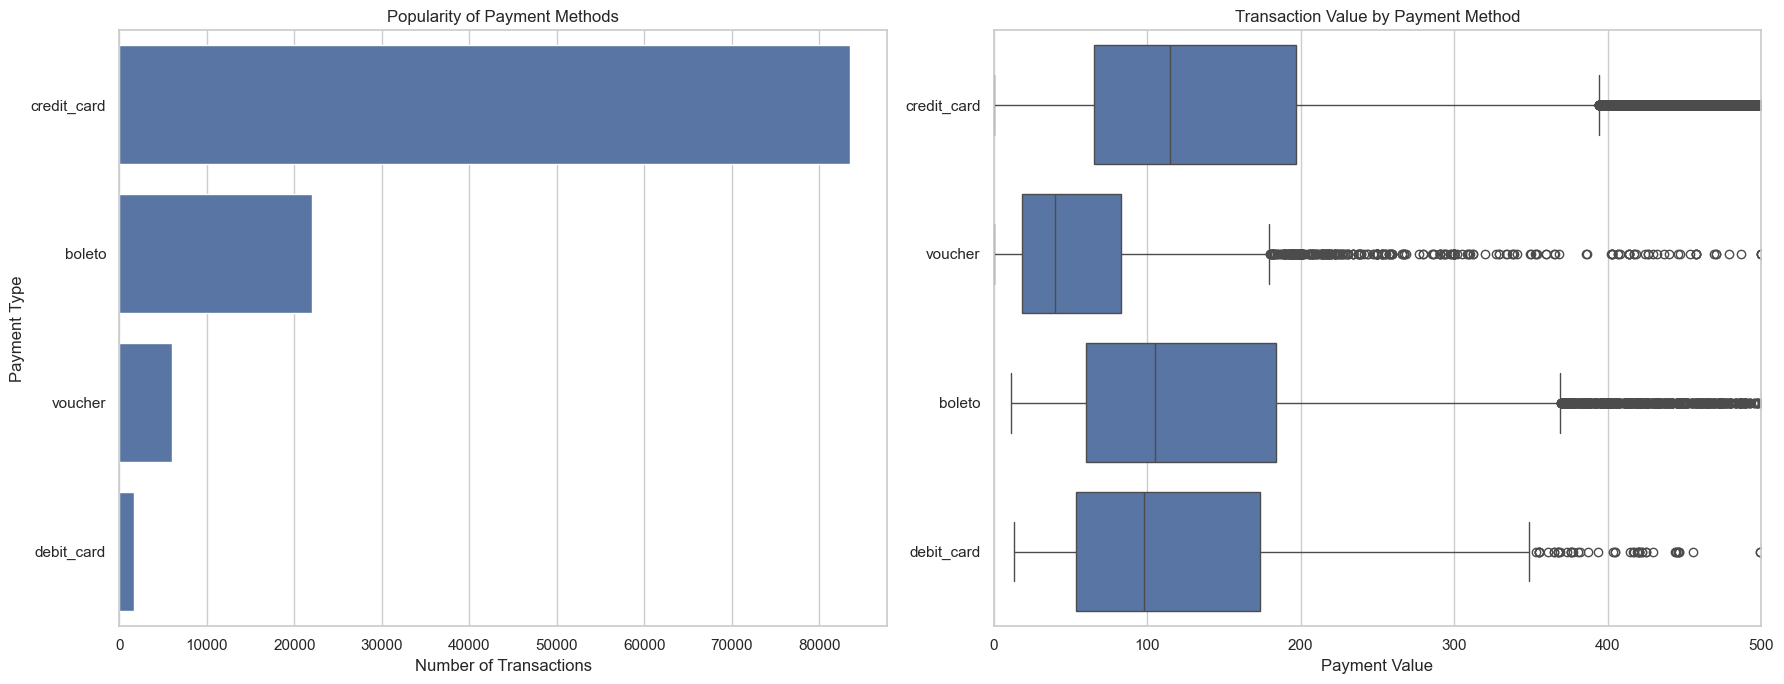

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Popularity of Payment Methods
sns.countplot(y='payment_type', data=df, order=df['payment_type'].value_counts().index, ax=axes[0])
axes[0].set_title('Popularity of Payment Methods')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Payment Type')

# Plot 2: Payment Value by Payment Method
sns.boxplot(x='payment_value', y='payment_type', data=df, ax=axes[1])
axes[1].set_title('Transaction Value by Payment Method')
axes[1].set_xlabel('Payment Value')
axes[1].set_ylabel('')
axes[1].set_xlim(0, 500) # Zoom in to see the distribution for common values

plt.tight_layout()
plt.show()

Inference: You will find that credit cards are by far the most dominant payment method. Furthermore, the box plot will show that credit card transactions also tend to have a higher median and a wider range of values, confirming they are used for more expensive purchases. Boleto (a Brazilian bank slip) is the second most popular, typically for lower-value transactions.

5. Seller Performance Analysis: Delivery Speed by Region

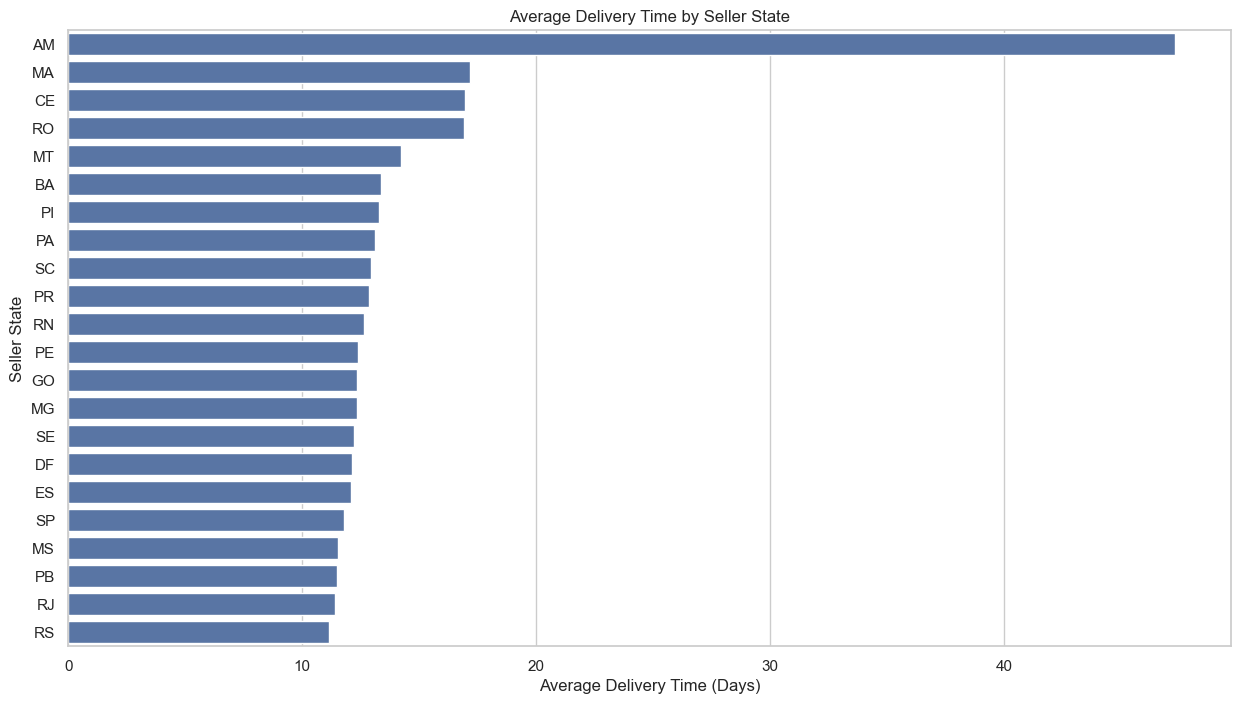

In [20]:
# Calculate average delivery time by seller's state
seller_delivery_performance = df.groupby('seller_state')['delivery_time'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(y=seller_delivery_performance.index, x=seller_delivery_performance.values, orient='h')
plt.title('Average Delivery Time by Seller State')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('Seller State')
plt.show()

Inference: The resulting chart will likely show that sellers in more remote or less commercially active states have significantly longer average delivery times compared to sellers in São Paulo (SP). This highlights the logistical advantage of sellers located near the primary customer base and suggests that sourcing products from sellers in these high-performing states could lead to better customer satisfaction.